In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
# import data
data = pd.read_csv(r"D:\Willy's Project\Project\Magang Diskominfo\data\dataset_final_translated.csv")
data

title  stars  \
0                    RS Brayat Minulya      5   
1                    RS Brayat Minulya      5   
2                    RS Brayat Minulya      5   
3                    RS Brayat Minulya      5   
4                    RS Brayat Minulya      5   
...                                ...    ...   
7634  Rumah Sakit Umum Pusat Surakarta      4   
7635  Rumah Sakit Umum Pusat Surakarta      4   
7636  Rumah Sakit Umum Pusat Surakarta      4   
7637  Rumah Sakit Umum Pusat Surakarta      5   
7638  Rumah Sakit Umum Pusat Surakarta      5   

                                                   text  
0     telah dirawat di sini selama beberapa hari di ...  
1     bersih dan rapi petugas peeawatdokter ditanya ...  
2     terimakasih atas pelayanan dan perawatan ibu s...  
3     pelayanan diruang yosef bagus perawat ramah ra...  
4     tempatnya bagusrapi nyaman sekali ruangan nya ...  
...                                                 ...  
7634  lama banget pelayanan untuk pasien baru ibu ny...  
7635            hospital yg sangat rapi pelayanan bagus  
7636                                        khusus paru  
7637                                            rs paru  
7638  rumah sakit untuk menangani penyakit paru dan ...  

[7639 rows x 3 columns]

hapus beberapa kata yang tidak perlu

In [5]:
import re

# daftar kata
stopwords = ['saya', 'yg', 'dan', 'yang', 'di', 'tidak', 'juga', 'utk', 'itu',
             'untuk', 'juga', 'jg', 'nya', 'tapi', 'tp', 'ga', 'gak', 'ngga', 'nggak', 'sy', 'lagi',
             'lg', 'dengan', 'dgn', 'dg', 'ini', 'kami', 'apa', 'ada', 'ke', 'ya', 'dong', 'sgt', 'bgt',
             'karena', 'krn', 'sebagai', 'sbg']

def remove_stopwords(text):
    if isinstance(text, str):
        pattern = r'\b(?:' + '|'.join(stopwords) + r')\b'
        return re.sub(pattern, '', text, flags=re.IGNORECASE).strip()
    return text

In [6]:
# apply function
data['text'] = data['text'].apply(remove_stopwords)

## Wordcloud Umum

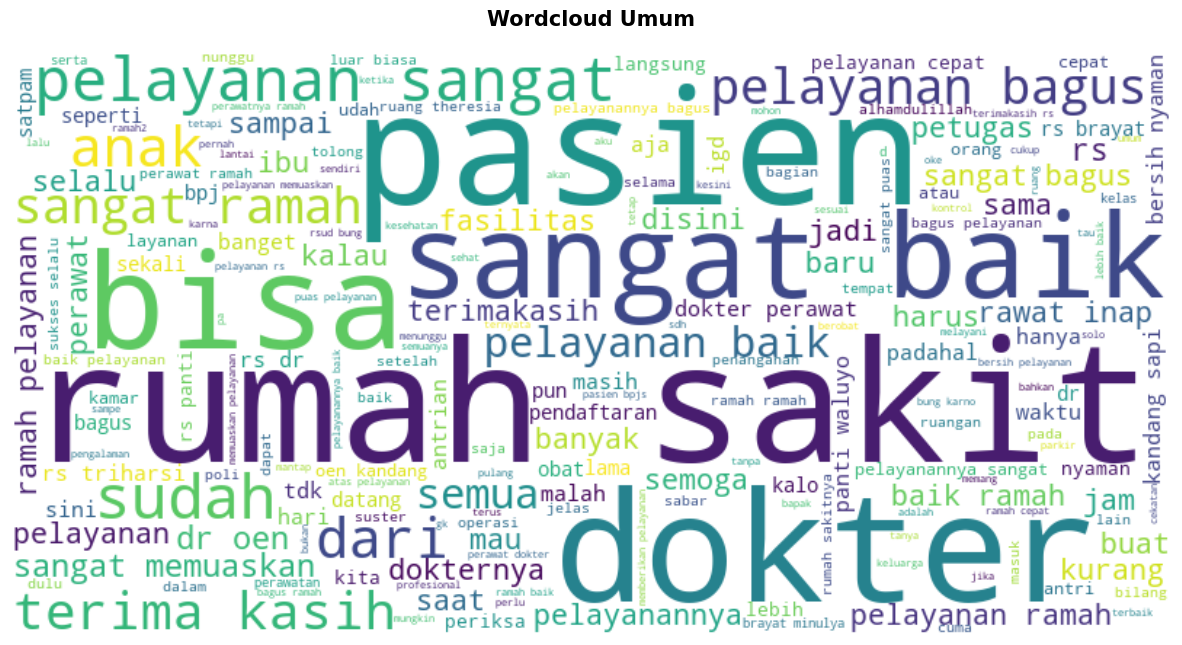

In [7]:
plt.figure(figsize=(15, 10))
# dropna
reviews = data['text'].dropna()
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Umum", fontsize=15, fontweight='bold', pad=20)
plt.show()

## Wordcloud Tiap RS

In [8]:
def wordclouds(data):
    rs = data['title'].unique()

    # looping
    for i in rs:
        # filter
        per_rs = data[data['title'] == i]
        reviews = per_rs['text'].dropna()

        plt.figure(figsize=(15, 10))

        # gabungkan semua teks
        review_combined = " ".join(reviews)

        # wordcloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color="white",
            max_words=150,
            colormap='viridis'
        ).generate(review_combined)

        # plot
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Wordcloud {i}", fontsize=15, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()

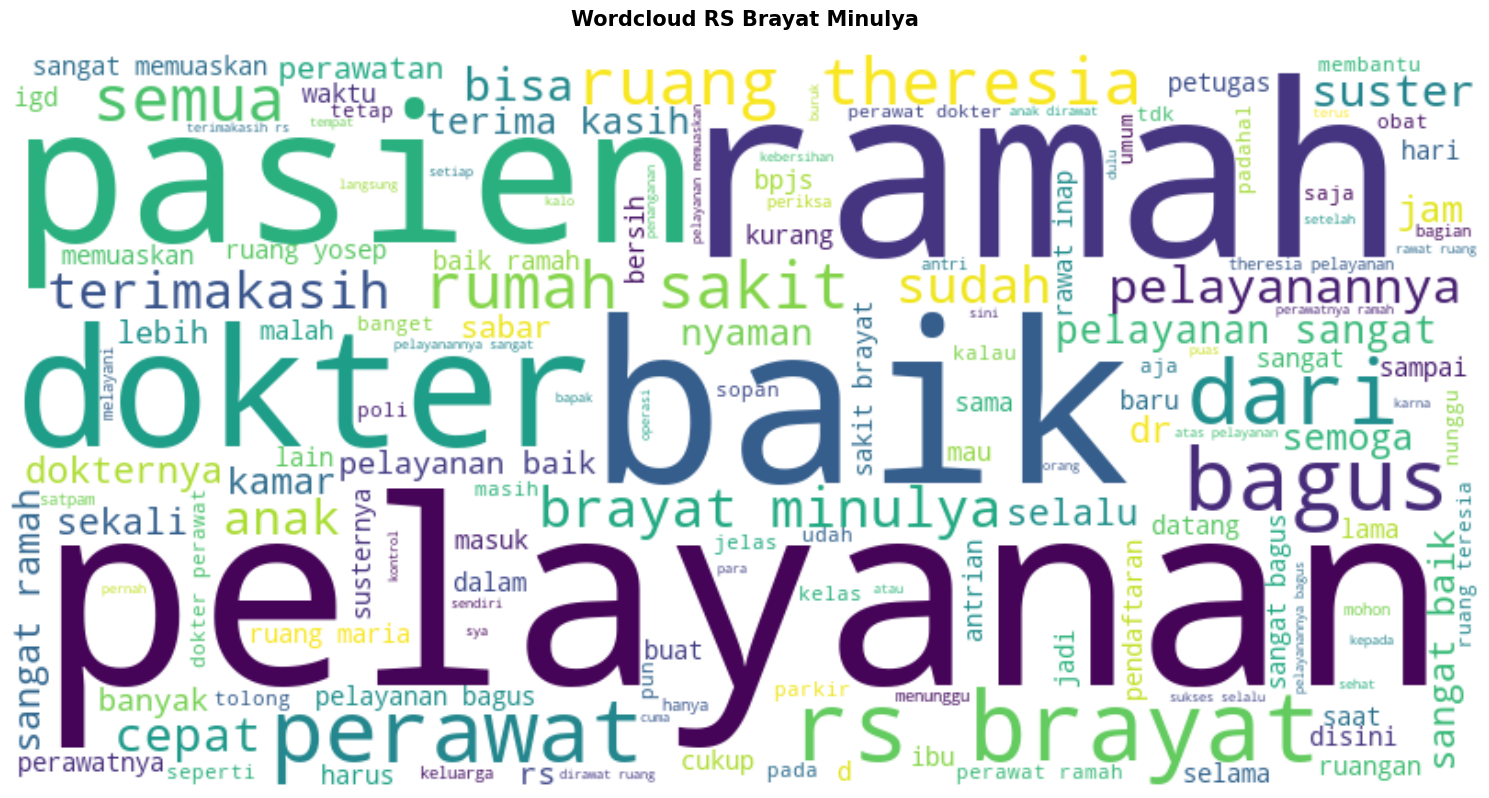

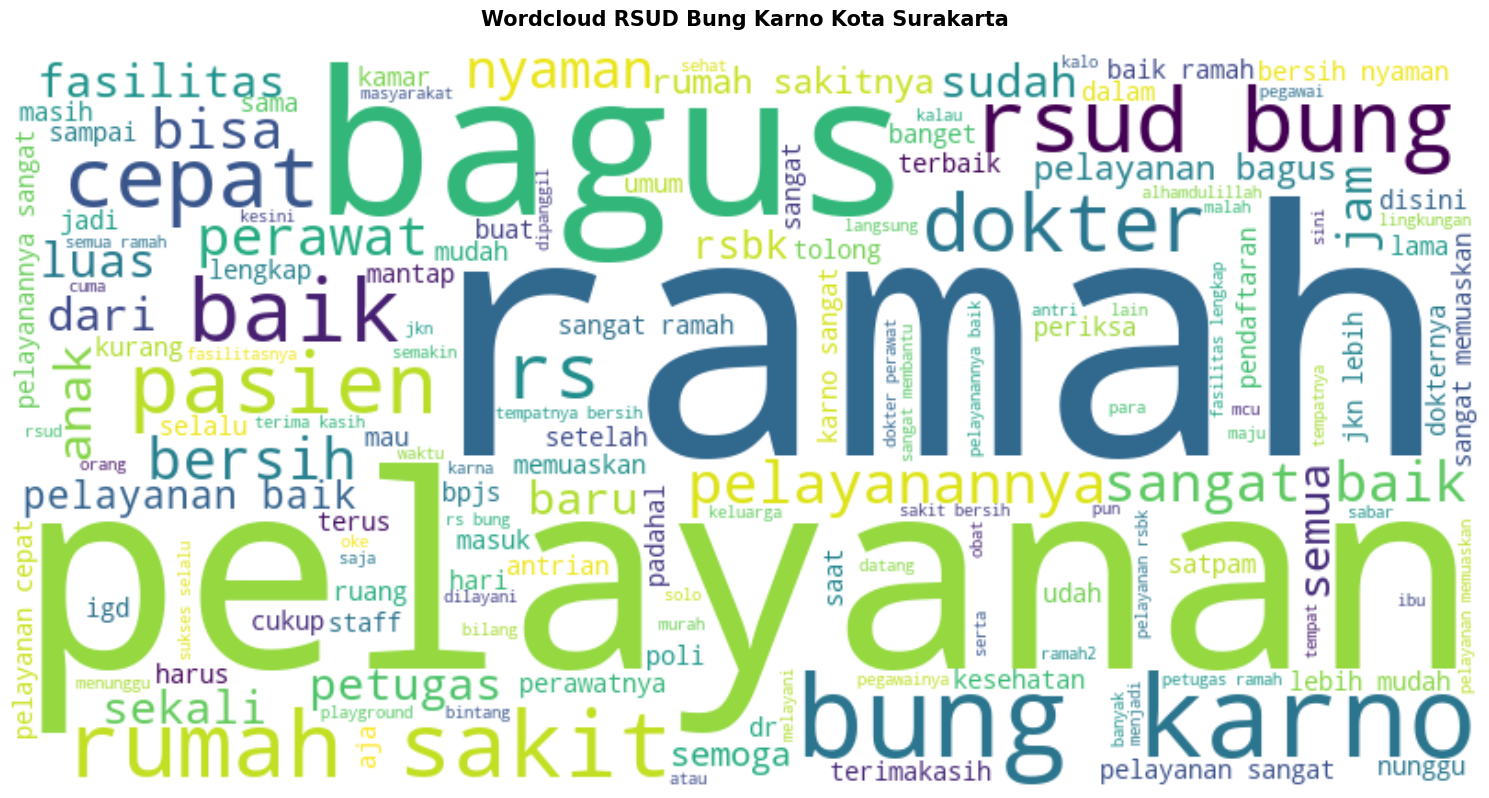

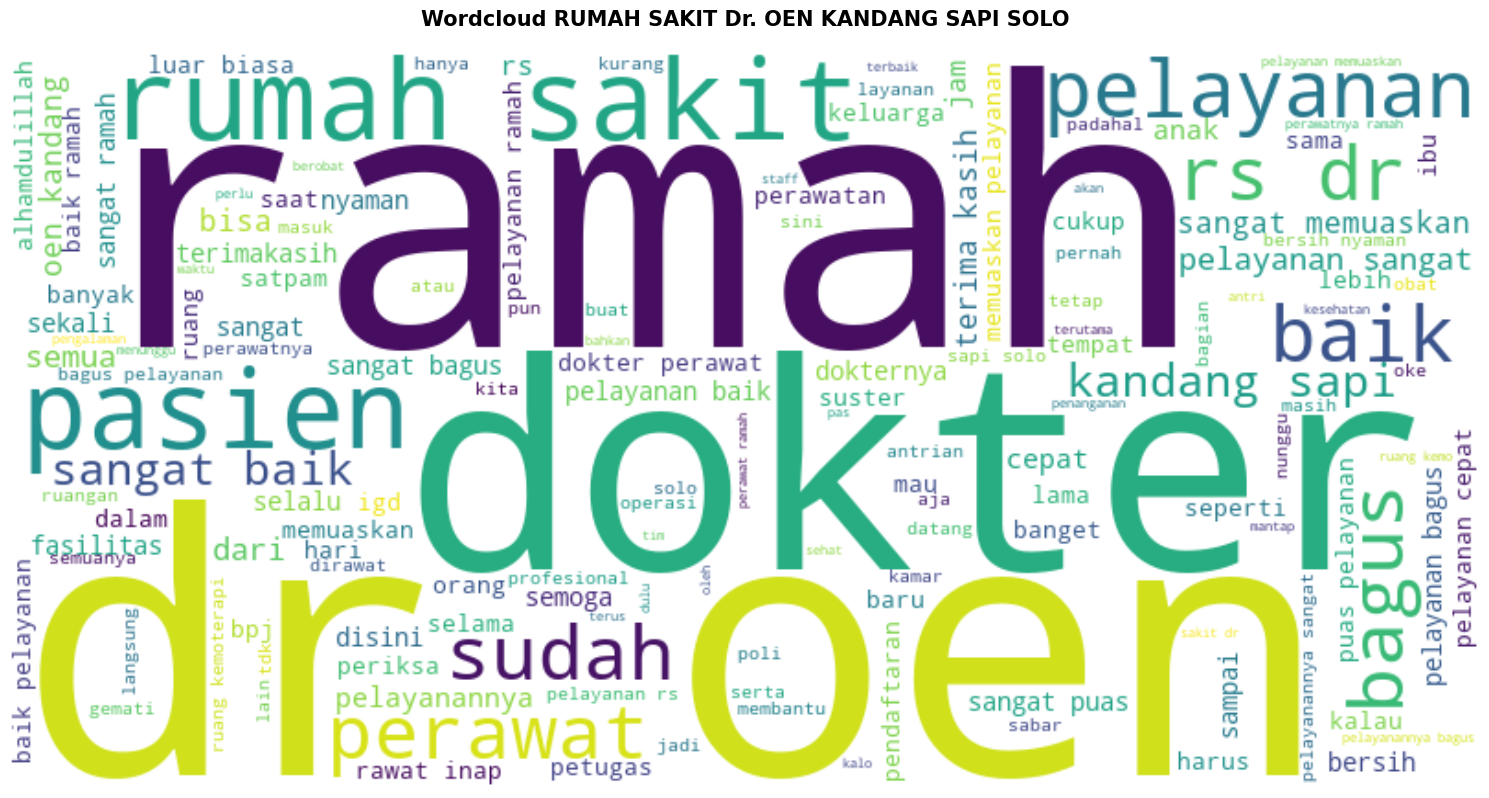

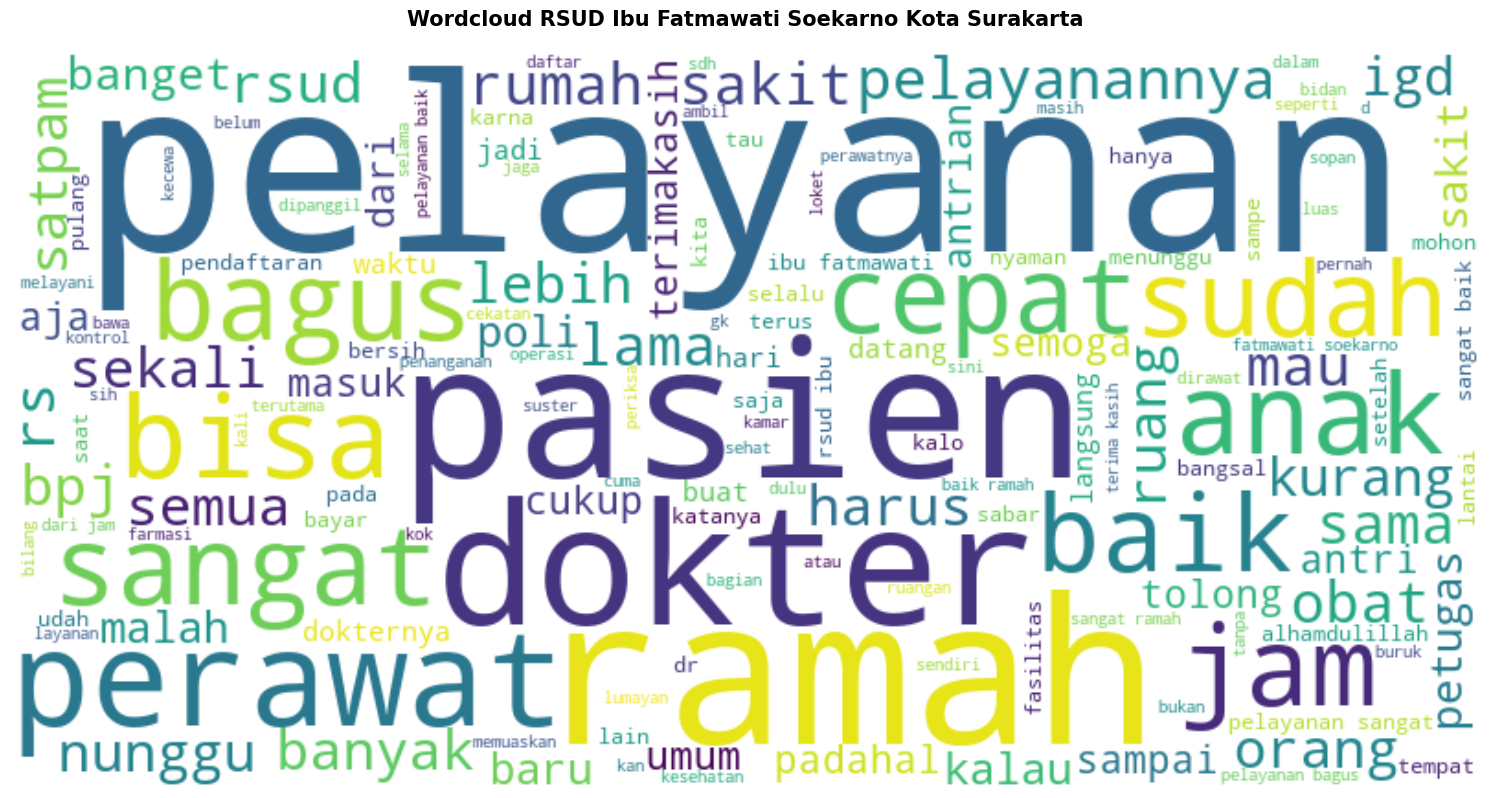

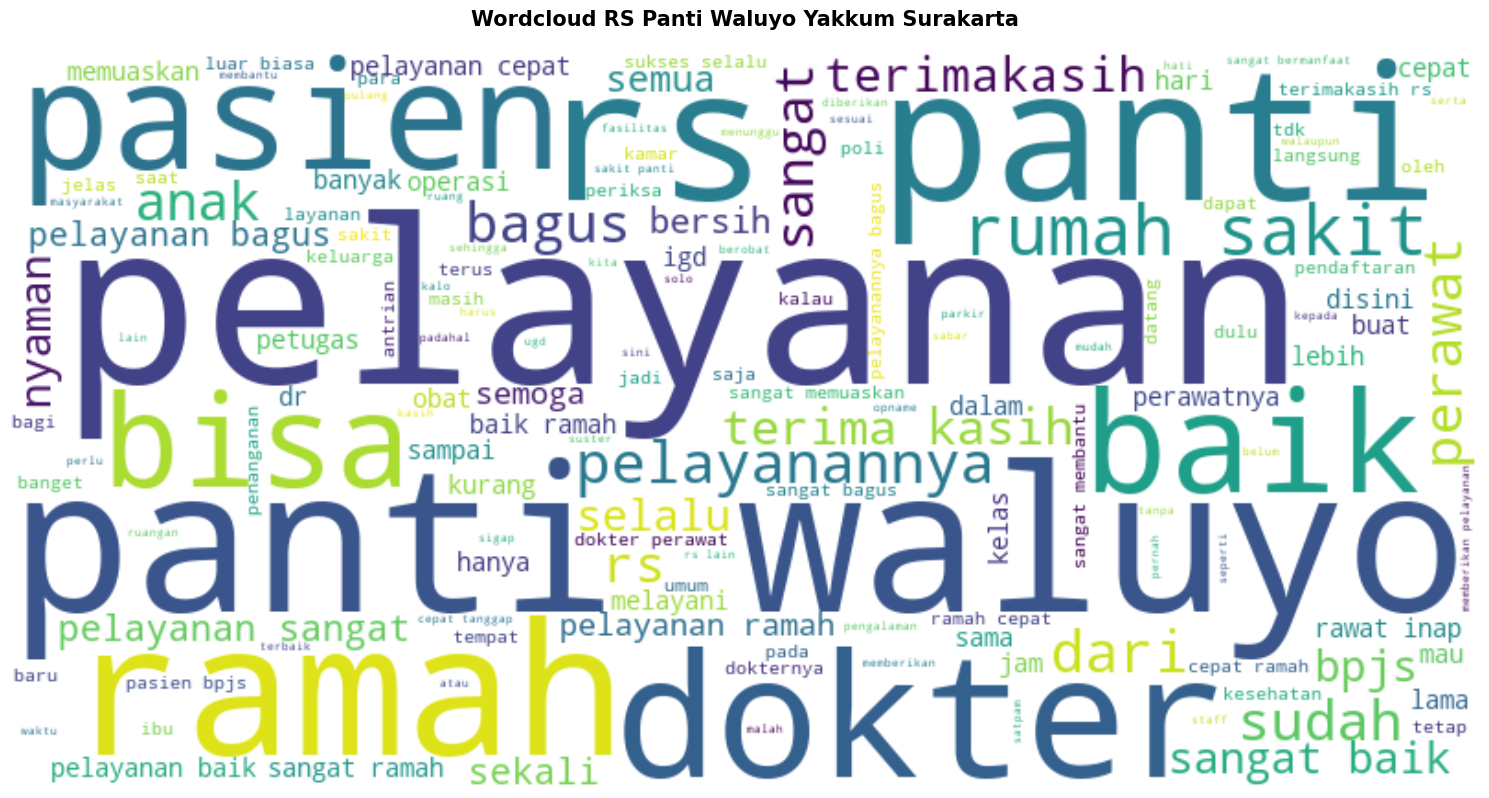

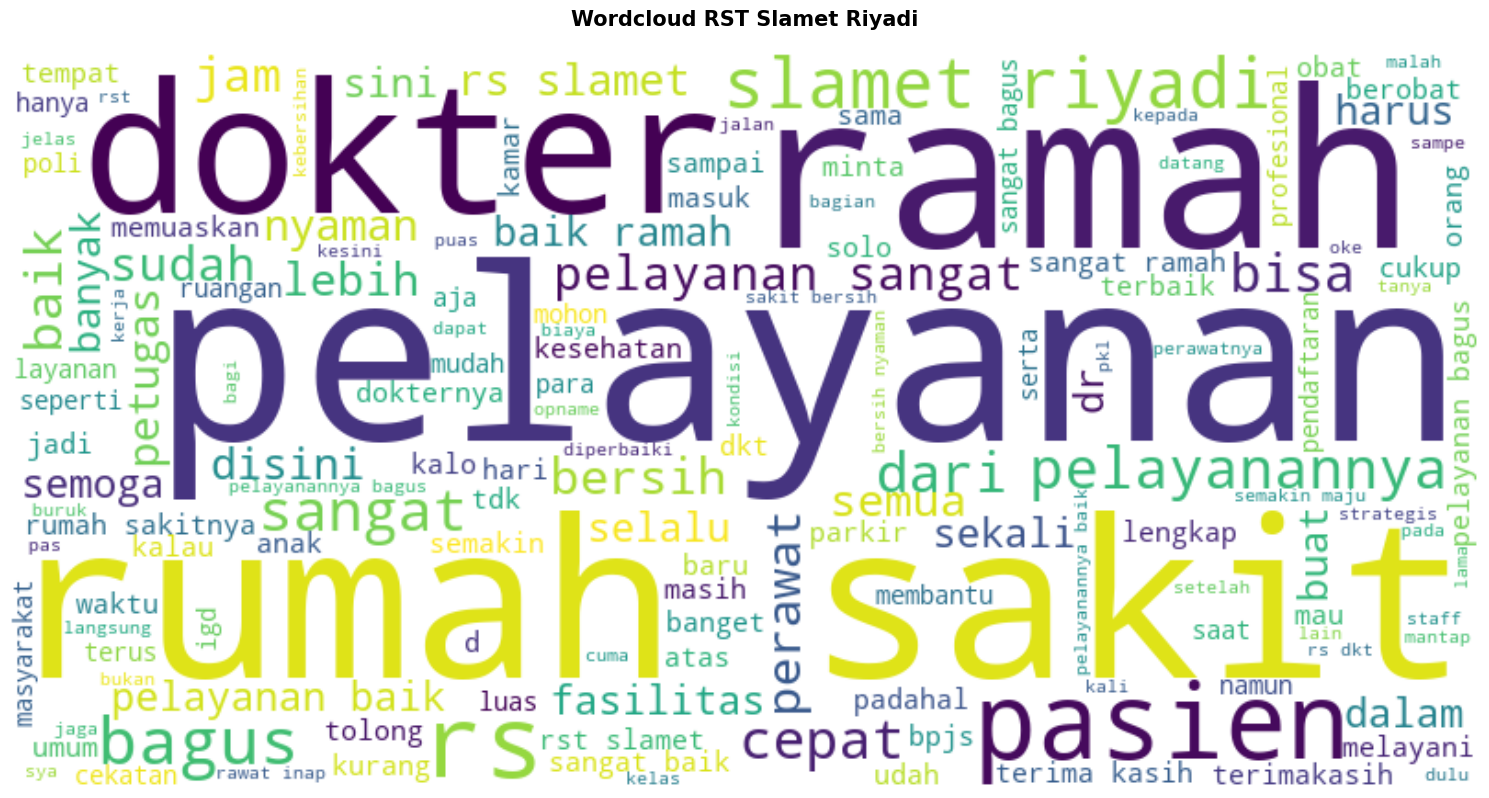

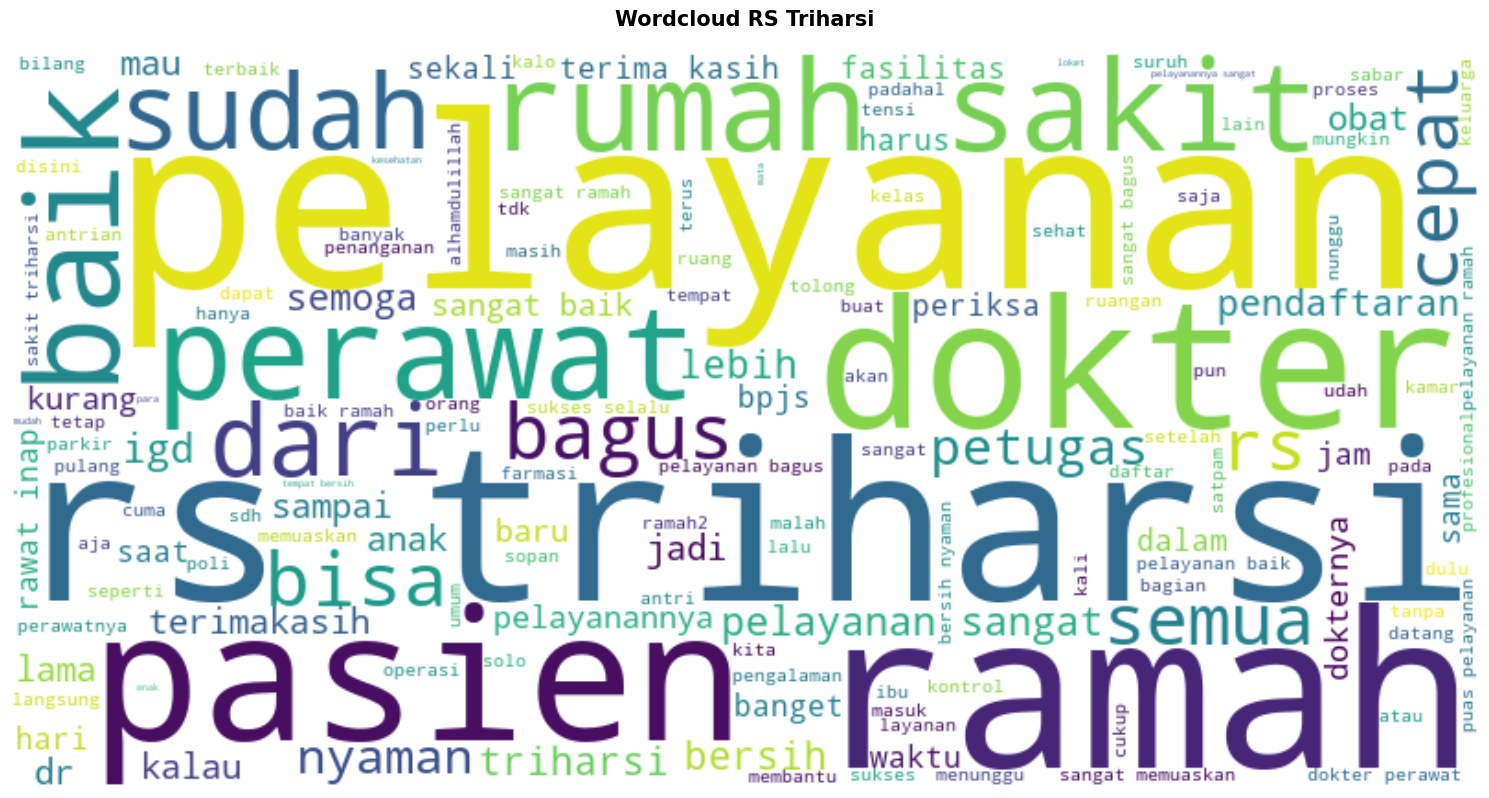

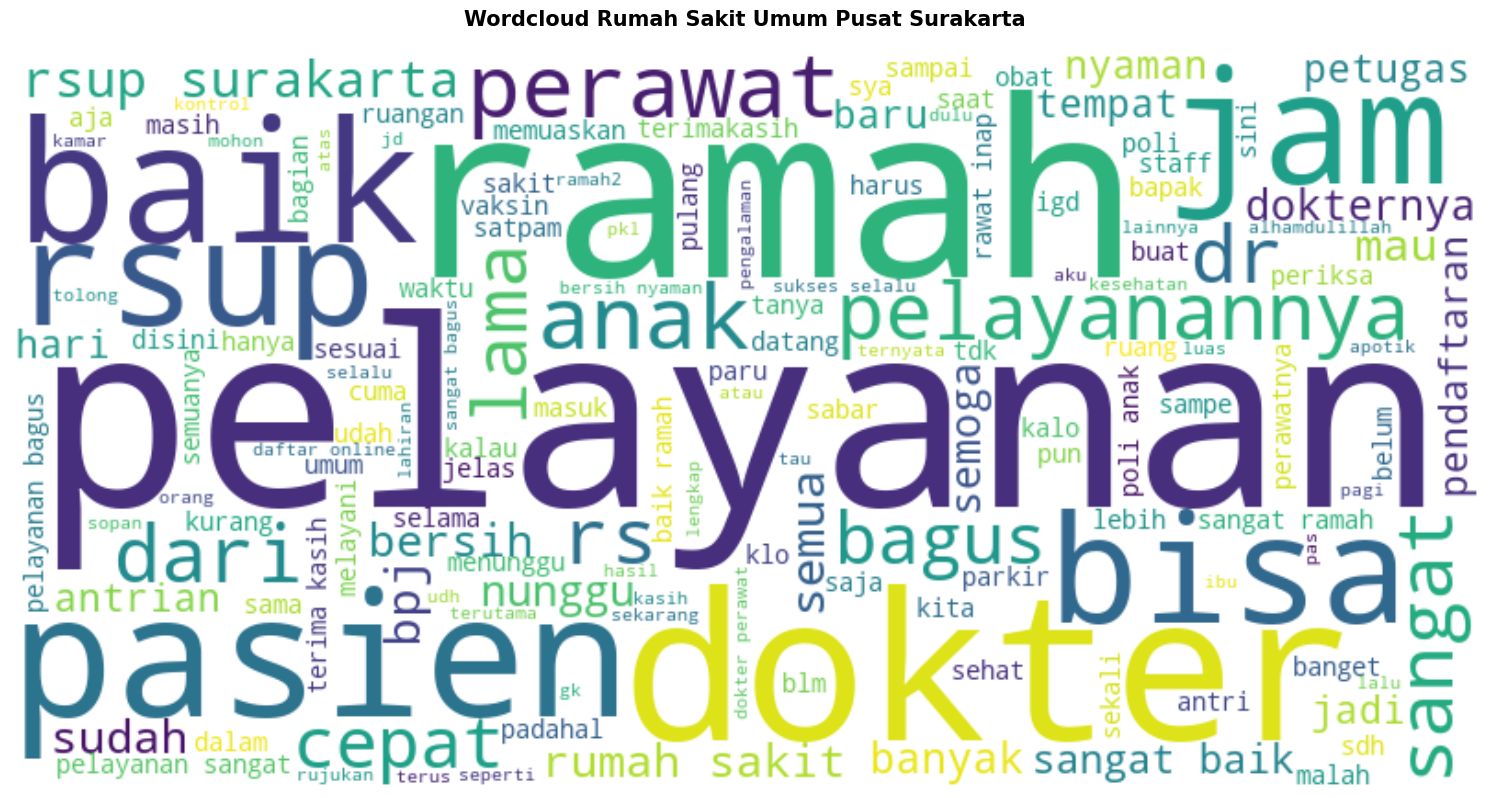

In [9]:
# apply
wordclouds(data)